In [1]:
#%%
"""
Created on Thu Nov 27 2018
Integrated Brownian motion
@author: Lech A. Grzelak
"""
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ComputeIntegrals(NoOfPaths,NoOfSteps,T):
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
    I1 = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])

    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]

        I1[:,i+1] = I1[:,i] + W[:,i] * (W[:,i+1]-W[:,i])
        time[i+1] = time[i] +dt

    paths = {"time":time,"W":W,"I1":I1}
    return paths

Mean = 0.008060378168326436 and variance =2.0301036871976814


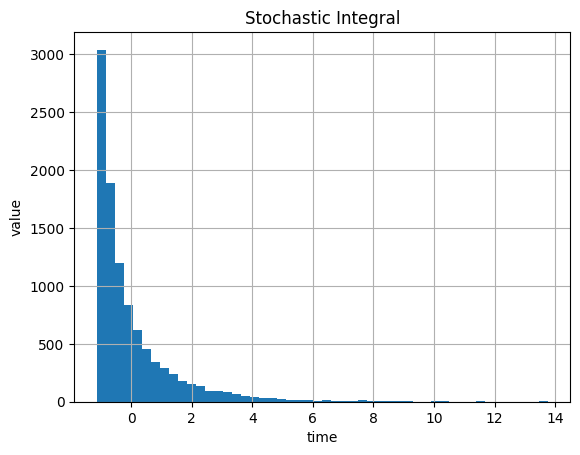

In [3]:
NoOfPaths = 10000
NoOfSteps = 1000
T = 2

output = ComputeIntegrals(NoOfPaths,NoOfSteps,T)
timeGrid = output["time"]
G_T = output["I1"]

plt.figure(1)
plt.grid()
plt.hist(G_T[:,-1],50, label = 'Distribution at end of time (T)')
plt.xlabel("time")
plt.ylabel("value")
plt.title("Stochastic Integral")

EX = np.mean(G_T[:,-1])
Var = np.var(G_T[:,-1])
print('Mean = {0} and variance ={1}'.format(EX,Var))


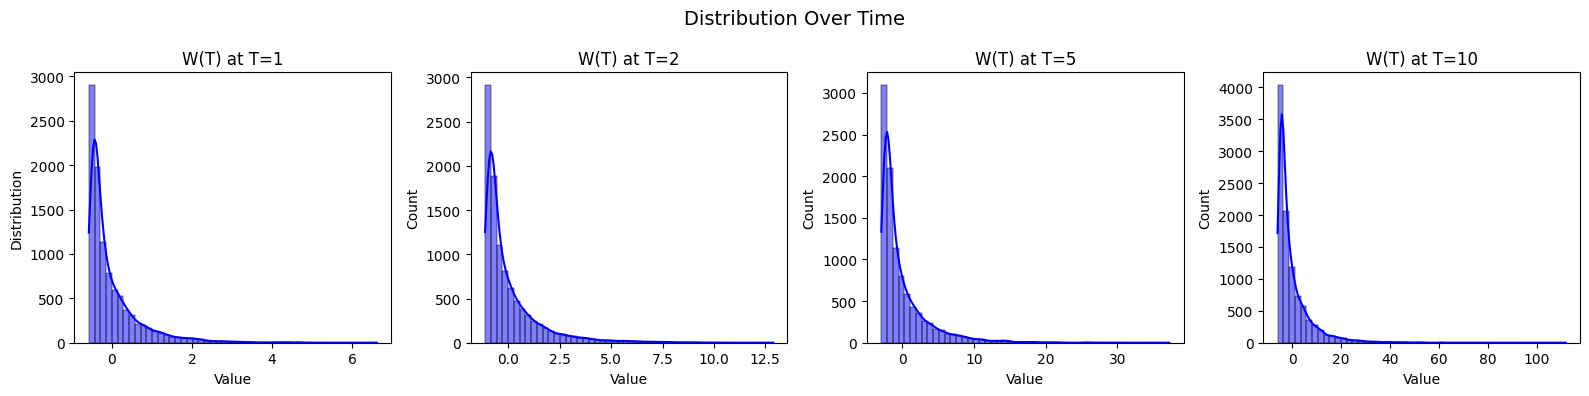

In [7]:
import seaborn as sns

# Set parameters
time_intervals = [1, 2, 5, 10]  # Different time points

fig, axes = plt.subplots(1, len(time_intervals), figsize=(16, 4))

for i, T in enumerate(time_intervals):
    # Generate samples
    output = ComputeIntegrals(NoOfPaths,NoOfSteps,T)
    timeGrid = output["time"]
    G_T = output["I1"]

    # Plot W(T)
    sns.histplot(G_T[:,-1], bins=50, kde=True, ax=axes[i], color="blue")
    axes[i].set_title(f"W(T) at T={T}")
    axes[i].set_xlabel("Value")
    
# Formatting
axes[0].set_ylabel("Distribution")
plt.suptitle("Distribution Over Time", fontsize=14)
plt.tight_layout()
plt.show()
